In [7]:
import math
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats as st


In [8]:
trainset=pd.read_csv('Credit_train.csv')

In [9]:
trainset.head()

,BUSAGE,BUSTYPE,MAXLINEUTIL,DAYSDELQ,TOTACBAL,DEFAULT
0,183.0,B,0.0,0.0,0.24,N
1,271.0,E,0.0,0.0,1.37,N
2,51.0,A,0.0,0.0,1.52,N
3,208.0,A,0.0,0.0,1.64,N
4,148.0,A,0.0,0.0,1.78,N


In [10]:
trainset.shape

(28427, 6)

In [11]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28427 entries, 0 to 28426
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BUSAGE       28235 non-null  float64
 1   BUSTYPE      28427 non-null  object 
 2   MAXLINEUTIL  24284 non-null  float64
 3   DAYSDELQ     27961 non-null  float64
 4   TOTACBAL     19224 non-null  float64
 5   DEFAULT      28427 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.3+ MB


In [12]:
trainset.columns

Index(['BUSAGE', 'BUSTYPE', 'MAXLINEUTIL', 'DAYSDELQ', 'TOTACBAL', 'DEFAULT'], dtype='object')

In [13]:
trainset.describe()

,BUSAGE,MAXLINEUTIL,DAYSDELQ,TOTACBAL
count,28235.000000,24284.000000,27961.000000,19224.000000
mean,111.305224,0.387184,0.447159,23211.690307
std,103.621210,0.430665,7.041783,22711.727115
min,1.000000,0.000000,0.000000,0.240000
25%,41.000000,0.000000,0.000000,5444.747500
50%,75.000000,0.269000,0.000000,16354.570000
75%,149.000000,0.773900,0.000000,34609.692500
max,1393.000000,14.095000,548.000000,429915.710000


In [14]:
# categorical and categorical 
pd.crosstab(trainset.BUSTYPE, trainset.DEFAULT,
            margins=True, 
            values=trainset.DEFAULT, 
            aggfunc=pd.Series.count
            )

DEFAULT,N,Y,All
BUSTYPE,,,
A,16469,1227,17696
B,5641,511,6152
C,1917,103,2020
D,2127,149,2276
E,67,2,69
F,202,12,214
All,26423,2004,28427


<Axes: xlabel='DEFAULT', ylabel='BUSTYPE'>

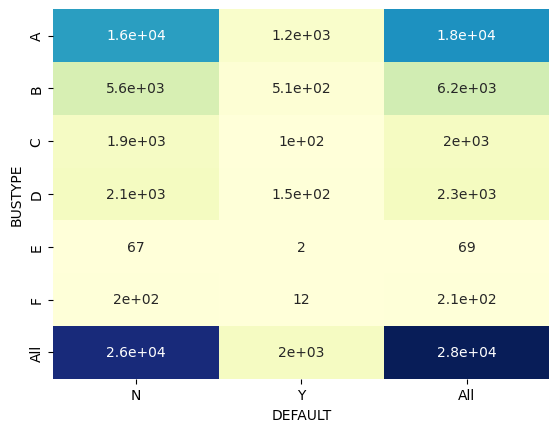

In [15]:
sns.heatmap(pd.crosstab(trainset.BUSTYPE, trainset.DEFAULT, margins=True, values=trainset.DEFAULT, aggfunc=pd.Series.count),
            cmap="YlGnBu", annot=True, cbar=False)

<Axes: xlabel='BUSTYPE', ylabel='TOTACBAL'>

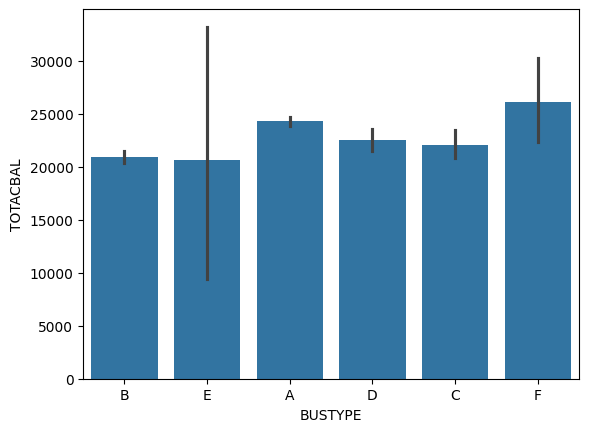

In [16]:
# categorical and numerical 
sns.barplot(x='BUSTYPE',y='TOTACBAL',data=trainset)

C:\Users\varun\AppData\Local\Temp\ipykernel_22716\1012904488.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BUSTYPE',y='TOTACBAL',data=trainset,palette='rainbow')


<Axes: xlabel='BUSTYPE', ylabel='TOTACBAL'>

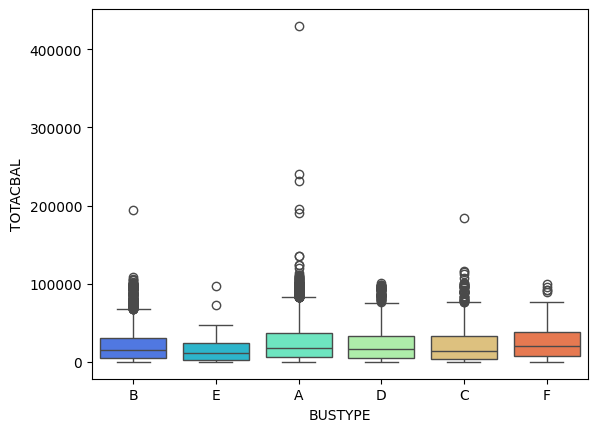

In [17]:
sns.boxplot(x='BUSTYPE',y='TOTACBAL',data=trainset,palette='rainbow')

C:\Users\varun\AppData\Local\Temp\ipykernel_22716\3423364854.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BUSTYPE',y='TOTACBAL',data=trainset,palette='rainbow')


<Axes: xlabel='BUSTYPE', ylabel='TOTACBAL'>

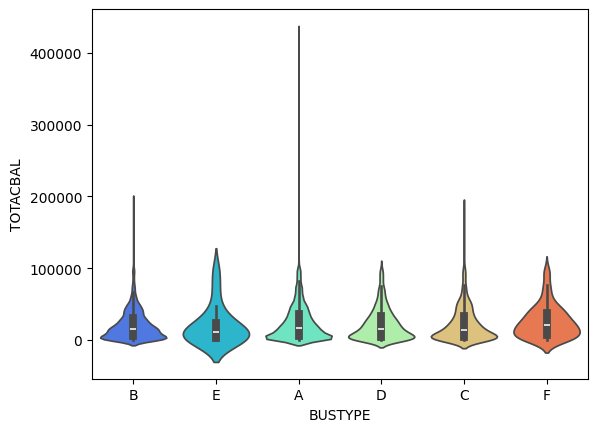

In [18]:
sns.violinplot(x='BUSTYPE',y='TOTACBAL',data=trainset,palette='rainbow')

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.

    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.

    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.

    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need 

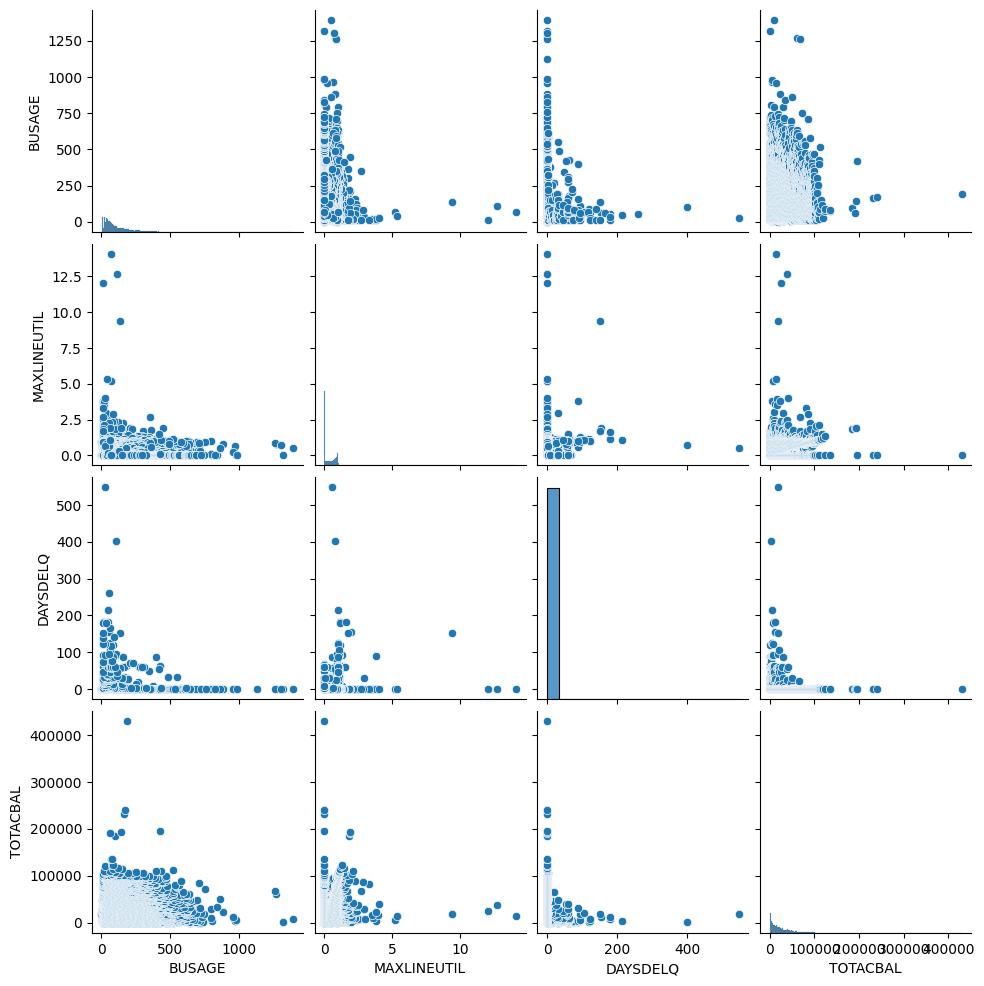

In [19]:
# numerical and numerical 
help(sns.pairplot)
g = sns.pairplot(trainset)

Help on class PairGrid in module seaborn.axisgrid:

class PairGrid(Grid)
 |  PairGrid(data, *, hue=None, vars=None, x_vars=None, y_vars=None, hue_order=None, palette=None, hue_kws=None, corner=False, diag_sharey=True, height=2.5, aspect=1, layout_pad=0.5, despine=True, dropna=False)
 |
 |  Subplot grid for plotting pairwise relationships in a dataset.
 |
 |  This object maps each variable in a dataset onto a column and row in a
 |  grid of multiple axes. Different axes-level plotting functions can be
 |  used to draw bivariate plots in the upper and lower triangles, and the
 |  marginal distribution of each variable can be shown on the diagonal.
 |
 |  Several different common plots can be generated in a single line using
 |  :func:`pairplot`. Use :class:`PairGrid` when you need more flexibility.
 |
 |  See the :ref:`tutorial <grid_tutorial>` for more information.
 |
 |  Method resolution order:
 |      PairGrid
 |      Grid
 |      _BaseGrid
 |      builtins.object
 |
 |  Methods defi

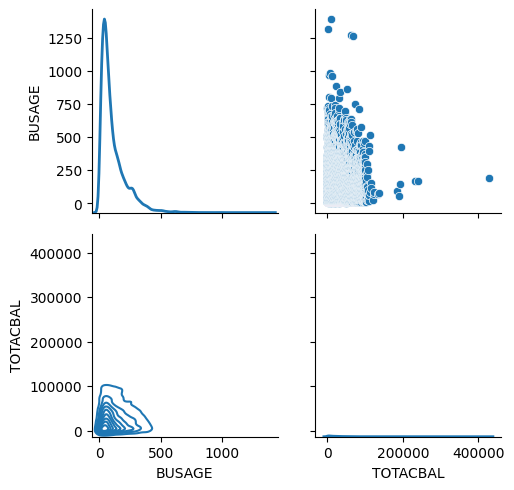

In [20]:
tr=trainset.drop(columns=['DEFAULT', 'BUSTYPE', 'MAXLINEUTIL','DAYSDELQ'])
tr.dropna(axis=0,how='any')
help(sns.PairGrid)
g = sns.PairGrid(tr)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot, colors="C0")
g = g.map_diag(sns.kdeplot, lw=2)

In [21]:
# Chi2 test - Categorical and Categorical
contigency= pd.crosstab(trainset['DEFAULT'], trainset['BUSTYPE']) 
contigency

BUSTYPE,A,B,C,D,E,F
DEFAULT,,,,,,
N,16469,5641,1917,2127,67,202
Y,1227,511,103,149,2,12


In [22]:
contigency_pct = pd.crosstab(trainset['DEFAULT'], trainset['BUSTYPE'], normalize='index')
help(pd.crosstab)
contigency_pct

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins: 'bool' = False, margins_name: 'Hashable' = 'All', dropna: 'bool' = True, normalize: "bool | Literal[0, 1, 'all', 'index', 'columns']" = False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors.

    By default, computes a frequency table of the factors unless an
    array of values and an aggregation function are passed.

    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequence, defa

BUSTYPE,A,B,C,D,E,F
DEFAULT,,,,,,
N,0.623283,0.213488,0.072550,0.080498,0.002536,0.007645
Y,0.612275,0.254990,0.051397,0.074351,0.000998,0.005988


<Axes: xlabel='BUSTYPE', ylabel='DEFAULT'>

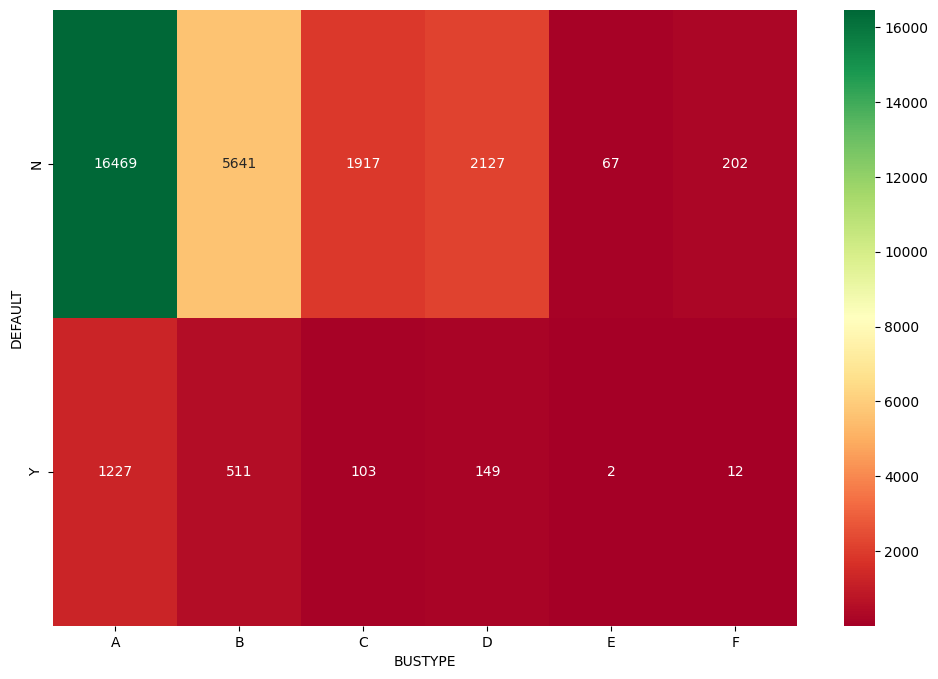

In [37]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="RdYlGn",
            fmt='g'
            )

In [ ]:
c, p, dof, expected = st.chi2_contingency(contigency) 
print(p)
chi2_contingency(contigency).expected_freq 

1.293177637815737e-05


array([[1.64484964e+04, 5.71830640e+03, 1.87759735e+03, 2.11555029e+03,
        6.41357512e+01, 1.98913779e+02],
       [1.24750357e+03, 4.33693601e+02, 1.42402645e+02, 1.60449713e+02,
        4.86424878e+00, 1.50862208e+01]])

In [ ]:
# t-test - Categorical and Numerical
tr=trainset.dropna(axis=0,how='any')
tr.describe()

,BUSAGE,MAXLINEUTIL,DAYSDELQ,TOTACBAL
count,19009.000000,19009.000000,19009.000000,19009.000000
mean,114.211847,0.478054,0.400179,23214.415733
std,104.140234,0.431787,7.129450,22677.431473
min,1.000000,0.000000,0.000000,0.240000
25%,45.000000,0.025900,0.000000,5487.110000
50%,78.000000,0.480700,0.000000,16390.370000
75%,152.000000,0.840300,0.000000,34605.740000
max,1393.000000,14.095000,548.000000,429915.710000


In [ ]:
a = tr.loc[tr['BUSTYPE'] == 'A', 'TOTACBAL'].to_numpy()
b = tr.loc[tr['BUSTYPE'] == 'B', 'TOTACBAL'].to_numpy()
a.var(), b.var()

(np.float64(564922022.7807394), np.float64(386124604.1225738))

In [ ]:
a = tr.loc[tr['BUSTYPE'] == 'A', 'TOTACBAL'].to_numpy()
b = tr.loc[tr['BUSTYPE'] == 'B', 'TOTACBAL'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

TtestResult(statistic=np.float64(8.77235264529358), pvalue=np.float64(1.9209860880165746e-18), df=np.float64(16212.0))

In [ ]:
# ANOVA - Categorical and Numerical
a = tr.loc[tr['BUSTYPE'] == 'A', 'TOTACBAL'].to_numpy()
b = tr.loc[tr['BUSTYPE'] == 'B', 'TOTACBAL'].to_numpy()
c = tr.loc[tr['BUSTYPE'] == 'C', 'TOTACBAL'].to_numpy()
fvalue, pvalue = st.f_oneway(a,b,c)
print(fvalue, pvalue)

39.803234940480245 5.664552247545447e-18


In [ ]:
# Linear - Numerical and Numerical
x = tr['MAXLINEUTIL'].to_numpy()
y = tr['DAYSDELQ'].to_numpy()
np.corrcoef(x, y)

array([[1.        , 0.06630208],
       [0.06630208, 1.        ]])